In [2]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))



In [3]:
1+1

2

In [4]:
from image import Image, Point

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
# from arclang.image import Image, Piece
from matplotlib.colors import ListedColormap, BoundaryNorm

def display_matrix(matrix):
    colors = [
        "#000000",  # black
        "#0074D9",  # blue
        "#FF4136",  # red
        "#2ECC40",  # green
        "#FFDC00",  # yellow
        "#AAAAAA",  # grey
        "#F012BE",  # fuchsia
        "#FF851B",  # orange
        "#7FDBFF",  # teal
        "#870C25",  # brown
    ]
    cmap = ListedColormap(colors)
    bounds = np.arange(-0.5, 10, 1)
    norm = BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)
    ax.set_title("Matrix")

    fig.colorbar(
        cax, ax=ax, ticks=np.arange(0, 10), orientation="vertical"
    ).ax.set_yticklabels(
        [
            "Symbol 0",
            "Symbol 1",
            "Symbol 2",
            "Symbol 3",
            "Symbol 4",
            "Symbol 5",
            "Symbol 6",
            "Symbol 7",
            "Symbol 8",
            "Symbol 9",
        ]
    )

    plt.show()

In [6]:
from function import compress3,compress2

In [7]:
img1 = Image(0, 0, 5, 5, [
            [1, 1, 0, 2, 2],
            [1, 1, 0, 2, 2],
            [0, 0, 0, 0, 0],
            [3, 3, 0, 4, 4],
            [3, 3, 0, 4, 4]
        ])
img2 = Image(0, 0, 5, 5, [
            [1, 1, 1, 1, 1],
            [1, 2, 2, 2, 1],
            [1, 2, 3, 2, 1],
            [1, 2, 2, 2, 1],
            [1, 1, 1, 1, 1]
        ])

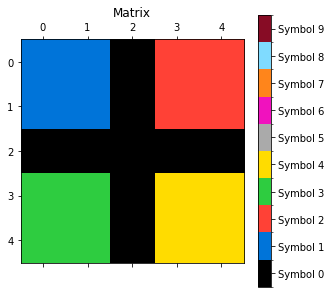

In [8]:
display_matrix(img1)

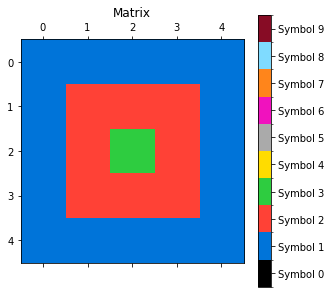

In [9]:
display_matrix(img2)

In [8]:
def compress3(img: Image) -> Image:
    if img.w * img.h <= 0:
        return Image()  # badImg equivalent

    row = np.zeros(img.h, dtype=bool)
    col = np.zeros(img.w, dtype=bool)
    row[0] = col[0] = True

    for i in range(1, img.h):
        for j in range(img.w):
            if img.mask[i, j] != img.mask[i-1, j]:
                row[i] = True
                break

    for j in range(1, img.w):
        for i in range(img.h):
            if img.mask[i, j] != img.mask[i, j-1]:
                col[j] = True
                break

    rows = np.where(row)[0]
    cols = np.where(col)[0]

    ret = Image(img.x, img.y, len(cols), len(rows))
    ret.mask = img.mask[np.ix_(rows, cols)]

    return ret

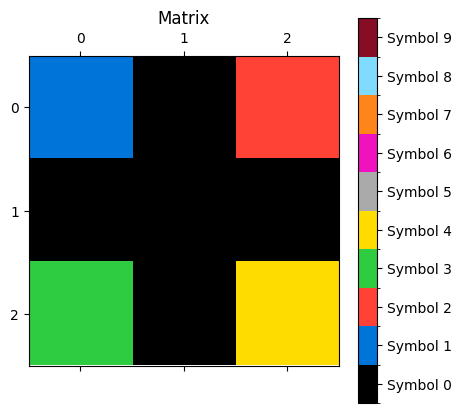

In [9]:
display_matrix(compress3(img1))

In [10]:
img1 = Image(0, 0, 5, 5, np.array([
    [1, 1, 0, 2, 2],
    [1, 1, 0, 2, 2],
    [0, 0, 0, 0, 0],
    [3, 3, 0, 4, 4],
    [3, 3, 0, 4, 4]
]))

result = compress3(img1)
print(result.mask)
print(f"Result dimensions: {result.w}x{result.h}")

[[1 0 2]
 [0 0 0]
 [3 0 4]]
Result dimensions: 3x3


In [11]:
def connect(img: Image, id: int) -> Image:
    assert 0 <= id < 3
    ret = Image.empty(img.x, img.y, img.w, img.h)

    if id == 0 or id == 2:  # Horizontal
        for i in range(img.h):
            last, lastc = -1, -1
            for j in range(img.w):
                if img.mask[i, j]:
                    if lastc != -1:
                        ret.mask[i, last:j+1] = lastc
                    lastc = img.mask[i, j]
                    last = j
            if lastc != -1:
                ret.mask[i, last:] = lastc

    if id == 1 or id == 2:  # Vertical
        for j in range(img.w):
            last, lastc = -1, -1
            for i in range(img.h):
                if img.mask[i, j]:
                    if lastc != -1:
                        ret.mask[last:i+1, j] = lastc
                    lastc = img.mask[i, j]
                    last = i
            if lastc != -1:
                ret.mask[last:, j] = lastc

    return ret

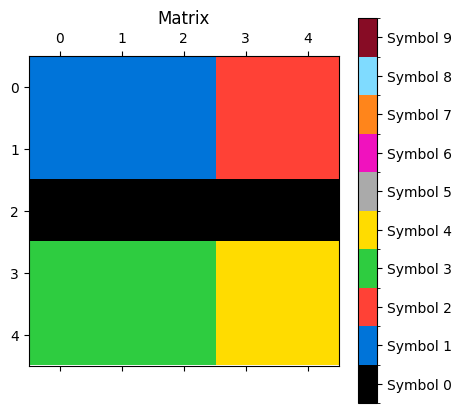

In [12]:
display_matrix(connect(img1,0))

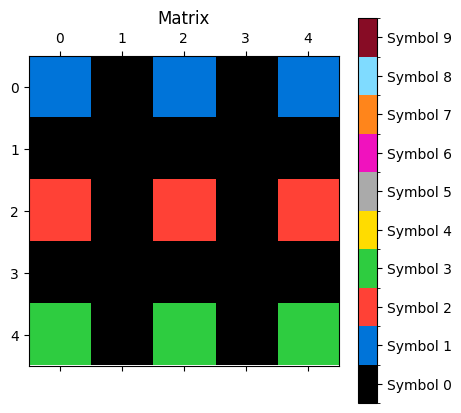

Horizontal result:


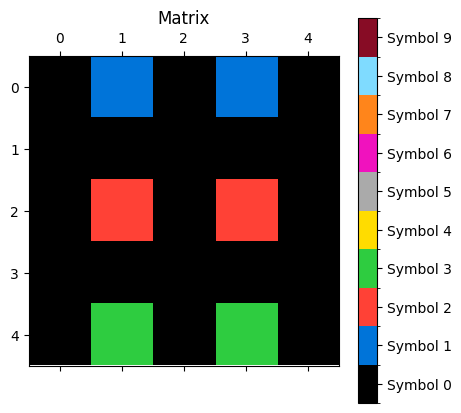

[[0 1 0 1 0]
 [0 0 0 0 0]
 [0 2 0 2 0]
 [0 0 0 0 0]
 [0 3 0 3 0]]
Vertical result:


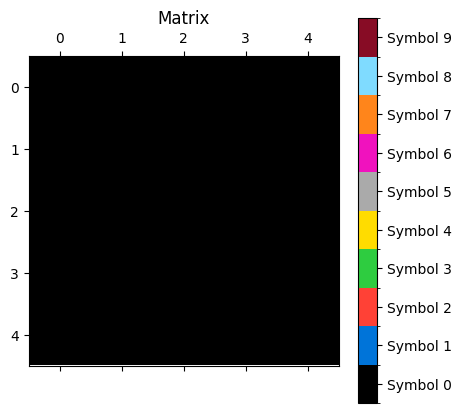

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Both directions result:


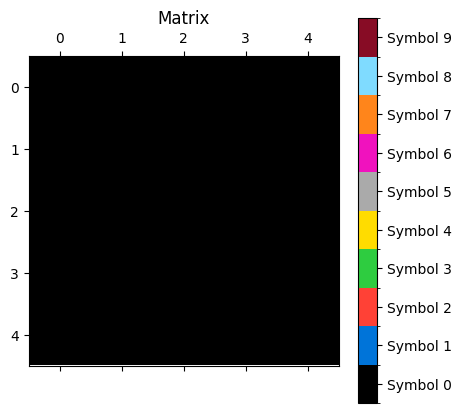

[[0 1 0 1 0]
 [0 0 0 0 0]
 [0 2 0 2 0]
 [0 0 0 0 0]
 [0 3 0 3 0]]


In [13]:
def connect(img: Image, id: int) -> Image:
    assert 0 <= id < 3
    ret = Image.empty(img.x, img.y, img.w, img.h)

    if id == 0 or id == 2:  # Horizontal
        for i in range(img.h):
            last = -1
            lastc = -1
            for j in range(img.w):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        for k in range(last + 1, j):
                            ret.mask[i, k] = lastc
                    lastc = img.mask[i, j]
                    last = j

    if id == 1 or id == 2:  # Vertical
        for j in range(img.w):
            last = -1
            lastc = -1
            for i in range(img.h):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        for k in range(last + 1, i):
                            ret.mask[k, j] = lastc
                    lastc = img.mask[i, j]
                    last = i

    return ret

# Test function
def test_connect():
    # Test image
    img = Image(0, 0, 5, 5, np.array([
        [1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [2, 0, 2, 0, 2],
        [0, 0, 0, 0, 0],
        [3, 0, 3, 0, 3]
    ]))
    display_matrix(img)

    # Test horizontal connection
    result_h = connect(img, 0)
    print("Horizontal result:")
    display_matrix(result_h)
    print(result_h.mask)

    # Test vertical connection
    result_v = connect(img, 1)
    print("Vertical result:")
    display_matrix(result_v)
    print(result_v.mask)

    # Test both directions
    result_both = connect(img, 2)
    print("Both directions result:")
    display_matrix(result_v)
    print(result_both.mask)

test_connect()

In [14]:
img1 = Image(0, 0, 5, 5, np.array([
            [1, 1, 0, 2, 2],
            [1, 1, 0, 2, 2],
            [0, 0, 0, 0, 0],
            [3, 3, 0, 4, 4],
            [3, 3, 0, 4, 4]
        ]))

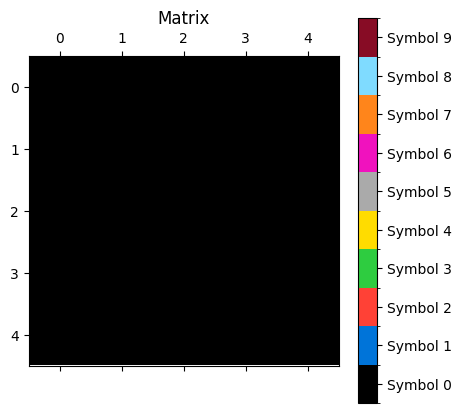

In [15]:
display_matrix(connect(img1,0))

In [16]:
def connect(img: Image, id: int) -> Image:
    assert 0 <= id < 3
    ret = Image.empty(img.x, img.y, img.w, img.h)

    if id == 0 or id == 2:  # Horizontal
        for i in range(img.h):
            last = -1
            lastc = -1
            for j in range(img.w):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        ret.mask[i, last+1:j] = lastc
                    lastc = img.mask[i, j]
                    last = j
                    ret.mask[i, j] = img.mask[i, j]

    if id == 1 or id == 2:  # Vertical
        for j in range(img.w):
            last = -1
            lastc = -1
            for i in range(img.h):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        ret.mask[last+1:i, j] = lastc
                    lastc = img.mask[i, j]
                    last = i
                    ret.mask[i, j] = img.mask[i, j]

    return ret

# Test function
def test_connect():
    # Test image
    img = Image(0, 0, 5, 5, np.array([
        [1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [2, 0, 2, 0, 2],
        [0, 0, 0, 0, 0],
        [3, 0, 3, 0, 3]
    ]))

    # Test horizontal connection
    result_h = connect(img, 0)
    print("Horizontal result:")
    print(result_h.mask)

    # Test vertical connection
    result_v = connect(img, 1)
    print("Vertical result:")
    print(result_v.mask)

    # Test both directions
    result_both = connect(img, 2)
    print("Both directions result:")
    print(result_both.mask)

test_connect()

Horizontal result:
[[1 1 1 1 1]
 [0 0 0 0 0]
 [2 2 2 2 2]
 [0 0 0 0 0]
 [3 3 3 3 3]]
Vertical result:
[[1 0 1 0 1]
 [0 0 0 0 0]
 [2 0 2 0 2]
 [0 0 0 0 0]
 [3 0 3 0 3]]
Both directions result:
[[1 1 1 1 1]
 [0 0 0 0 0]
 [2 2 2 2 2]
 [0 0 0 0 0]
 [3 3 3 3 3]]


In [38]:
def connect(img: Image, id: int) -> Image:
    assert 0 <= id < 3
    ret = Image.empty(img.x, img.y, img.w, img.h)

    if id == 0 or id == 2:  # Horizontal
        for i in range(img.h):
            last = -1
            lastc = -1
            for j in range(img.w):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        ret.mask[i, last+1:j] = lastc
                    lastc = img.mask[i, j]
                    last = j
                    ret.mask[i, j] = img.mask[i, j]

    if id == 1 or id == 2:  # Vertical
        for j in range(img.w):
            last = -1
            lastc = -1
            for i in range(img.h):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        ret.mask[last+1:i, j] = lastc
                    lastc = img.mask[i, j]
                    last = i
                    ret.mask[i, j] = img.mask[i, j]

    return ret

# Test function
def test_connect():
    # Test image
    img = Image(0, 0, 5, 5, np.array([
        [1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [2, 0, 2, 0, 2],
        [0, 0, 0, 0, 0],
        [3, 0, 3, 0, 3]
    ]))

    # Test horizontal connection
    result_h = connect(img, 0)
    print("Horizontal result:")
    print(result_h.mask)

    # Test vertical connection
    result_v = connect(img, 1)
    print("Vertical result:")
    print(result_v.mask)

    # Test both directions
    result_both = connect(img, 2)
    print("Both directions result:")
    print(result_both.mask)

test_connect()

Horizontal result:
[[1 1 1 1 1]
 [0 0 0 0 0]
 [2 2 2 2 2]
 [0 0 0 0 0]
 [3 3 3 3 3]]
Vertical result:
[[1 0 1 0 1]
 [0 0 0 0 0]
 [2 0 2 0 2]
 [0 0 0 0 0]
 [3 0 3 0 3]]
Both directions result:
[[1 1 1 1 1]
 [0 0 0 0 0]
 [2 2 2 2 2]
 [0 0 0 0 0]
 [3 3 3 3 3]]


In [39]:
def connect(img: Image, id: int) -> Image:
    assert 0 <= id < 3
    ret = Image.empty(img.x, img.y, img.w, img.h)

    if id == 0 or id == 2:  # Horizontal
        for i in range(img.h):
            last = -1
            lastc = -1
            for j in range(img.w):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        for k in range(last + 1, j):
                            ret.mask[i, k] = lastc
                    lastc = img.mask[i, j]
                    last = j

    if id == 1 or id == 2:  # Vertical
        for j in range(img.w):
            last = -1
            lastc = -1
            for i in range(img.h):
                if img.mask[i, j]:
                    if img.mask[i, j] == lastc:
                        for k in range(last + 1, i):
                            ret.mask[k, j] = lastc
                    lastc = img.mask[i, j]
                    last = i

    return ret

# Test function
def test_connect():
    # Test image
    img = Image(0, 0, 5, 5, np.array([
        [1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [2, 0, 2, 0, 2],
        [0, 0, 0, 0, 0],
        [3, 0, 3, 0, 3]
    ]))

    # Test horizontal connection
    result_h = connect(img, 0)
    print("Horizontal result:")
    print(result_h.mask)

    # Test vertical connection
    result_v = connect(img, 1)
    print("Vertical result:")
    print(result_v.mask)

    # Test both directions
    result_both = connect(img, 2)
    print("Both directions result:")
    print(result_both.mask)

test_connect()

Horizontal result:
[[0 1 0 1 0]
 [0 0 0 0 0]
 [0 2 0 2 0]
 [0 0 0 0 0]
 [0 3 0 3 0]]
Vertical result:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Both directions result:
[[0 1 0 1 0]
 [0 0 0 0 0]
 [0 2 0 2 0]
 [0 0 0 0 0]
 [0 3 0 3 0]]


In [40]:
from function import extend2

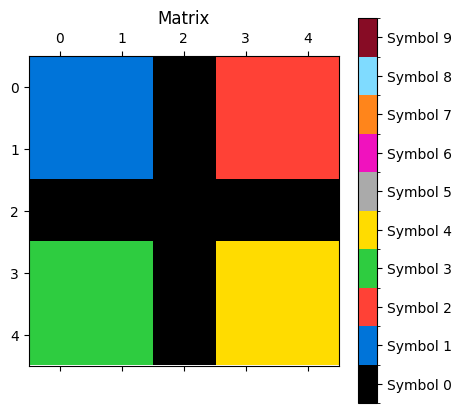

In [41]:
display_matrix(img1)

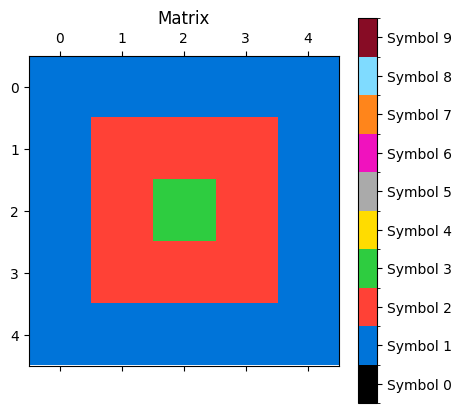

In [42]:
display_matrix(img2)

In [43]:
def extend2(img: Image, room: Image) -> Image:
    ret = Image.empty(room.x, room.y, room.w, room.h)
    done = np.zeros((room.h, room.w), dtype=int)
    
    d = Point(room.x - img.x, room.y - img.y)
    donew = 10**6
    for i in range(ret.h):
        for j in range(ret.w):
            x, y = j + d.x, i + d.y
            if 0 <= x < img.w and 0 <= y < img.h:
                ret.mask[i, j] = img.mask[y, x]
                done[i, j] = donew

    piece_cnt = {}
    bw, bh = 3, 3
    for r in range(8):
        rot = rigid(img, r)
        for i in range(rot.h - bh + 1):
            for j in range(rot.w - bw + 1):
                mask = tuple(rot.mask[i:i+bh, j:j+bw].flatten())
                piece_cnt[mask] = piece_cnt.get(mask, 0) + 1

    piece = [(count, list(p)) for p, count in piece_cnt.items()]

    return greedy_fill(ret, piece, done, bw, bh, donew)

In [45]:
# display_matrix(extend2(img2,img1))

In [46]:
img = Image(0, 0, 4, 4, np.array([
            [1, 1, 0, 0],
            [1, 1, 0, 0],
            [0, 0, 0, 0],
            [0, 0, 0, 0]
        ]))

In [47]:
# result = greedy_fill_black2(img, N=2)
# display_matrix(img),display_matrix(result)

In [48]:
def stack_line(shapes: List[Image]) -> Image:
    n = len(shapes)
    if n == 0:
        return Image()  # badImg equivalent
    elif n == 1:
        return shapes[0]

    xs = [shape.x for shape in shapes]
    ys = [shape.y for shape in shapes]
    xs.sort()
    ys.sort()

    xmin = float('inf')
    ymin = float('inf')
    for i in range(1, n):
        xmin = min(xmin, xs[i] - xs[i-1])
        ymin = min(ymin, ys[i] - ys[i-1])

    dx, dy = (0, 1) if xmin < ymin else (1, 0)

    order = [(shape.x * dx + shape.y * dy, i) for i, shape in enumerate(shapes)]
    order.sort()

    out = shapes[order[0][1]]
    for i in range(1, n):
        out = my_stack(out, shapes[order[i][1]], dy)

    return out

In [49]:
def stack_line(shapes: List[Image]) -> Image:
    if not shapes:
        return Image()  # badImg equivalent
    if len(shapes) == 1:
        return shapes[0]

    xs = sorted(shape.x for shape in shapes)
    ys = sorted(shape.y for shape in shapes)
    xmin = min(xs[i] - xs[i-1] for i in range(1, len(xs)))
    ymin = min(ys[i] - ys[i-1] for i in range(1, len(ys)))

    dx, dy = (1, 0) if xmin < ymin else (0, 1)
    order = sorted(enumerate(shapes), key=lambda x: x[1].x * dx + x[1].y * dy)

    out = shapes[order[0][0]]
    for _, img in order[1:]:
        out = my_stack(out, img, dy)
    return out

In [50]:
 imgs = [
            Image(0, 0, 2, 2, np.full((2, 2), 1)),
            Image(3, 0, 2, 2, np.full((2, 2), 2)),
            Image(6, 0, 2, 2, np.full((2, 2), 3))
        ]


In [52]:
from arclang.function import *

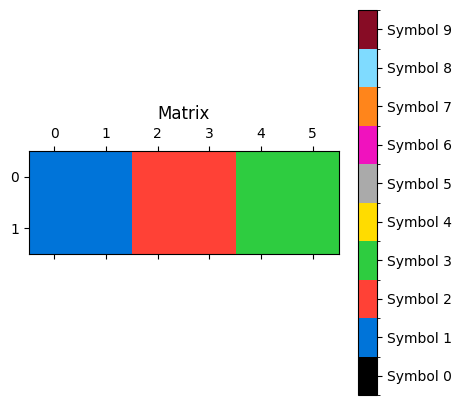

In [53]:
display_matrix(stack_line(imgs))

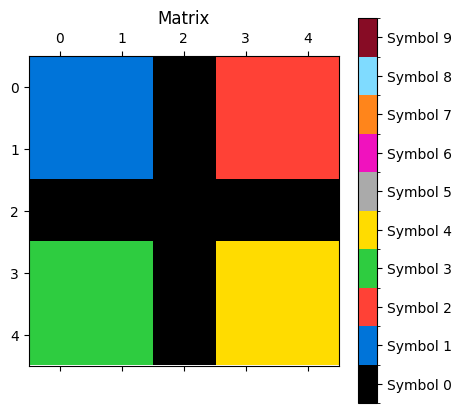

In [54]:
display_matrix(img1)

In [55]:
def smear(img: Image, id: int) -> Image:
    assert 0 <= id < 15
    directions = [
        [(1,0)], [(-1,0)], [(0,1)], [(0,-1)],
        [(1,0), (-1,0)], [(0,1), (0,-1)],
        [(1,0), (-1,0), (0,1), (0,-1)],
        [(1,1)], [(-1,-1)], [(1,-1)], [(-1,1)],
        [(1,1), (-1,-1)], [(1,-1), (-1,1)],
        [(1,1), (-1,-1), (1,-1), (-1,1)],
        [(1,0), (-1,0), (0,1), (0,-1), (1,1), (-1,-1), (1,-1), (-1,1)]
    ]

    ret = img.copy()
    w = img.w

    for dx, dy in directions[id]:
        di = dy * w + dx

        for i in range(ret.h):
            step = 1 if i == 0 or i == ret.h - 1 else max(ret.w - 1, 1)
            for j in range(0, ret.w, step):
                if i - dy < 0 or j - dx < 0 or i - dy >= img.h or j - dx >= img.w:
                    steps = MAXSIDE
                    if dx == -1:
                        steps = min(steps, j + 1)
                    if dx == 1:
                        steps = min(steps, img.w - j)
                    if dy == -1:
                        steps = min(steps, i + 1)
                    if dy == 1:
                        steps = min(steps, img.h - i)

                    ind = i * w + j
                    end_ind = ind + steps * di
                    c = 0
                    while ind != end_ind:
                        if img.mask[ind // w, ind % w]:
                            c = img.mask[ind // w, ind % w]
                        if c:
                            ret.mask[ind // w, ind % w] = c
                        ind += di

    return ret

NameError: name 'img_smear' is not defined

In [58]:
img_smear = Image(0, 0, 5, 5, np.array([
            [1, 0, 0, 0, 2],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [3, 0, 0, 0, 4]
        ]))

smear(img_smear,6).mask

array([[1, 2, 2, 2, 2],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 4, 4, 4, 4]], dtype=int8)

In [59]:
smear(img_smear,6).mask

array([[1, 2, 2, 2, 2],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 4, 4, 4, 4]], dtype=int8)

In [60]:
img = Image(0, 0, 5, 5, np.array([
            [1, 0, 0, 0, 2],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [3, 0, 0, 0, 4]
        ]))
result = smear(img, 6)  # All directions
expected = np.array([[1, 2, 2, 2, 2],
[3, 0, 0, 0, 4],
[3, 0, 0, 0, 4],
[3, 0, 0, 0, 4],
[3, 4, 4, 4, 4]])

In [61]:
result.mask

array([[1, 2, 2, 2, 2],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 0, 0, 0, 4],
       [3, 4, 4, 4, 4]], dtype=int8)

In [62]:
np.array_equal(result.mask, expected)

True

In [63]:
def gravity(in_img: Image, d: int) -> List[Image]:
    pieces = split_all(in_img)
    room = hull0(in_img)
    dx, dy = [(1, 0), (-1, 0), (0, 1), (0, -1)][d]

    ret = []
    out = room.copy()
    pieces.sort(key=lambda a: a.x * dx + a.y * dy, reverse=True)

    for p in pieces:
        while True:
            p.x += dx
            p.y += dy
            
            if not is_valid_position(p, out):
                p.x -= dx
                p.y -= dy
                break
        
        ret.append(p)
        out = compose_id(out, p, 3)

    return ret

def is_valid_position(piece: Image, out: Image) -> bool:
    for i in range(piece.h):
        for j in range(piece.w):
            if piece.mask[i, j] != 0:
                x, y = j + piece.x - out.x, i + piece.y - out.y
                if x < 0 or y < 0 or x >= out.w or y >= out.h or out.mask[y, x] != 0:
                    return False
    return True

In [64]:
in_img = [[0, 0, 6, 0, 0],
      [0, 1, 0, 2, 0],
      [0, 1, 0, 2, 0],
      [3, 0, 0, 0, 4],
      [3, 0, 0, 0, 4]]
in_img = Image(0, 0, 5, 5,in_img)

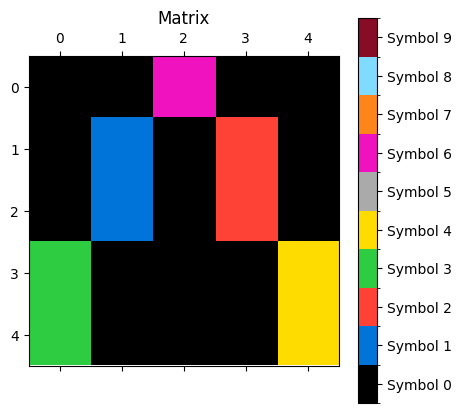

In [65]:
display_matrix(in_img)

In [66]:
display_matrix(gravity(in_img,2)[5])

IndexError: list index out of range

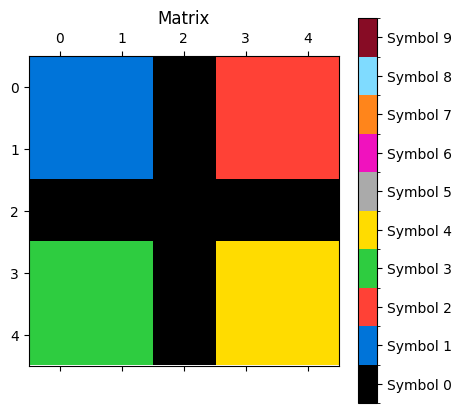

In [67]:
display_matrix(img1)

In [68]:

Image pickUnique(vImage_ imgs, int id) {
  assert(id == 0);

  int n = imgs.size();
  if (!n) return badImg;

  //Pick the one with the unique color
  vector<int> mask(n);
  vector<int> cnt(10);
  for (int i = 0; i < n; i++) {
    mask[i] = core::colMask(imgs[i]);
    for (int c = 0; c < 10; c++) {
      if (mask[i]>>c&1) cnt[c]++;
    }
  }
  int reti = -1;
  for (int i = 0; i < n; i++) {
    for (int c = 0; c < 10; c++) {
      if (mask[i]>>c&1) {
	if (cnt[c] == 1) {
	  if (reti == -1) reti = i;
	  else return badImg;
	}
      }
    }
  }
  if (reti == -1) return badImg;
  return imgs[reti];
}

SyntaxError: invalid syntax (624441991.py, line 1)

In [78]:
def pick_unique(imgs: List[Image]) -> Image:
    if not imgs:
        return Image()  # badImg equivalent

    n = len(imgs)
    mask = [0] * n
    cnt = [0] * 10

    for i, img in enumerate(imgs):
        mask[i] = img.col_mask()
        for c in range(10):
            if mask[i] >> c & 1:
                cnt[c] += 1

    reti = -1
    for i in range(n):
        for c in range(10):
            if mask[i] >> c & 1:
                if cnt[c] == 1:
                    if reti == -1:
                        reti = i
                    else:
                        return Image()  # badImg equivalent

    if reti == -1:
        return Image()  # badImg equivalent
    return imgs[reti]

In [80]:
imgs = [
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
    Image(0, 0, 2, 2, np.array([[3, 3], [3, 4]]))
]
result = pick_unique(imgs)
result.mask


array([], shape=(0, 0), dtype=int8)

In [89]:
def pick_unique(imgs: List[Image]) -> Image:
    if not imgs:
        return Image()  # badImg equivalent

    n = len(imgs)
    color_count = [0] * 10  # Assuming colors are 0-9

    # Count occurrences of each color across all images
    for img in imgs:
        unique_colors = set(img.mask.flatten())
        for color in unique_colors:
            color_count[color] += 1

    reti = -1
    for i, img in enumerate(imgs):
        unique_colors = set(img.mask.flatten())
        unique_color_count = sum(1 for color in unique_colors if color_count[color] == 1)
        
        if unique_color_count == 1:
            if reti == -1:
                reti = i
            else:
                return Image()  # badImg equivalent if more than one image has a unique color

    return imgs[reti] if reti != -1 else Image()  # badImg equivalent

# Test the function
imgs = [
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
    Image(0, 0, 2, 2, np.array([[3, 3], [3, 4]]))
]
result = pick_unique(imgs)
print(result.mask)

[]


In [90]:
imgs = [
    Image(0, 0, 2, 2, np.full((2, 2), 1)),
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
    Image(0, 0, 2, 2, np.array([[3, 3], [3, 4]]))
]
result = pick_unique(imgs)
np.array_equal(result.mask, np.array([[3, 3], [3, 4]]))


False

In [87]:
print(result.mask)

[]


In [99]:
def find_unique_image(imgs: List[Image]) -> Image:
    if not imgs:
        return Image()  # Empty image / badImg equivalent

    # Count occurrences of each color across all images
    color_count = {}
    for img in imgs:
        for color in set(img.mask.flatten()):
            if color not in color_count:
                color_count[color] = 1
            else:
                color_count[color] += 1

    l = []
    # Find the image with a unique color
    for img in imgs:
        unique_colors = [color for color in set(img.mask.flatten()) if color_count[color] == 1]
        if unique_colors:
            l.append(img)
    if len(l)!=0:
        return l[-1]
    return Image()  # No unique image found

# Test the function
imgs = [
    Image(0, 0, 2, 2, np.full((2, 2), 2)),
   Image(0, 0, 2, 2, np.array([[3, 3], [3, 4]])),
    Image(0, 0, 2, 2, np.array([[3, 3], [3, 4]]))
]

result = find_unique_image(imgs)
print(result.mask)
print(np.array_equal(result.mask, np.array([[3, 3], [3, 4]])))


[[2 2]
 [2 2]]
False


In [96]:
imgs[0].mask

array([[1, 1],
       [1, 1]], dtype=int8)

/tmp/ipykernel_29069/3062621385.py:26: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)
/tmp/ipykernel_29069/3062621385.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)


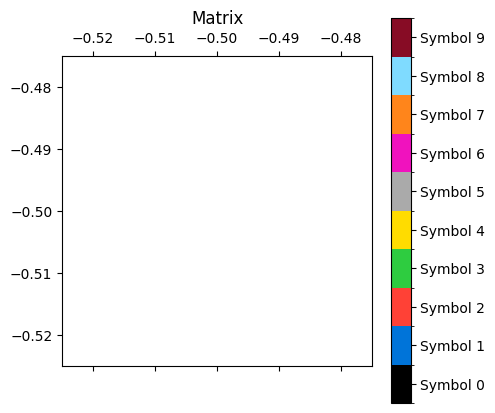

In [72]:
display_matrix(result)

In [73]:
img = Image(0, 0, 3, 3, np.array([
[1, 1, 1],
[1, 2, 1],
[1, 1, 1]
]))
room = Image(0, 0, 5, 5)
result = extend2(img, room)

/tmp/ipykernel_29069/3062621385.py:26: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)
/tmp/ipykernel_29069/3062621385.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)


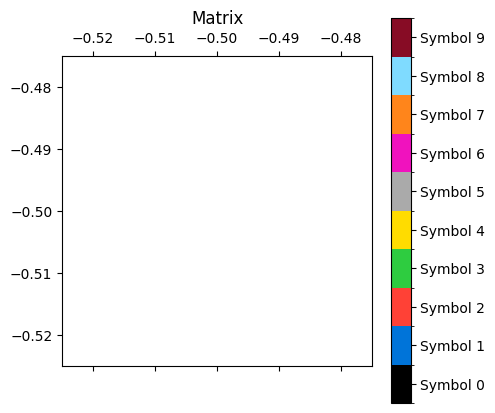

In [74]:
display_matrix(result)

In [103]:
def extend2(img: Image, room: Image) -> Image:
    ret = Image.empty(room.x, room.y, room.w, room.h)
    done = np.zeros((room.h, room.w), dtype=int)

    d = Point(room.x - img.x, room.y - img.y)
    donew = 10**6
    for i in range(ret.h):
        for j in range(ret.w):
            x, y = j + d.x, i + d.y
            if 0 <= x < img.w and 0 <= y < img.h:
                ret.mask[i, j] = img.mask[y, x]
                done[i, j] = donew

    piece_cnt = {}
    bw, bh = 3, 3
    for r in range(8):
        rot = rigid(img, r)
        for i in range(rot.h - bh + 1):
            for j in range(rot.w - bw + 1):
                mask = []
                for y in range(bh):
                    for x in range(bw):
                        mask.append(rot.mask[i+y, j+x])
                mask = tuple(mask)  # Make it hashable
                piece_cnt[mask] = piece_cnt.get(mask, 0) + 1

    piece = []
    for p, c in piece_cnt.items():
        piece.append((c, list(p)))

    return greedy_fill(ret, piece, done, bw, bh, donew)

In [106]:
def extend2(img: Image, room: Image) -> Image:
    ret = Image.empty(room.x, room.y, room.w, room.h)
    done = np.zeros((room.h, room.w), dtype=int)

    # Calculate the offset to center the original image
    offset_x = (room.w - img.w) // 2
    offset_y = (room.h - img.h) // 2

    # Copy the original image to the center of the new space
    ret.mask[offset_y:offset_y+img.h, offset_x:offset_x+img.w] = img.mask
    done[offset_y:offset_y+img.h, offset_x:offset_x+img.w] = 1

    # Extend the pattern
    for i in range(room.h):
        for j in range(room.w):
            if done[i, j] == 0:
                # Find the nearest pixel from the original image
                ori_i = min(max(i - offset_y, 0), img.h - 1)
                ori_j = min(max(j - offset_x, 0), img.w - 1)
                ret.mask[i, j] = img.mask[ori_i, ori_j]

    # The rest of the function (piece counting) remains the same
    piece_cnt = {}
    bw, bh = 3, 3
    for r in range(8):
        rot = rigid(ret, r)  # Note: We're now using 'ret' instead of 'img'
        for i in range(rot.h - bh + 1):
            for j in range(rot.w - bw + 1):
                mask = tuple(rot.mask[i:i+bh, j:j+bw].flatten())
                piece_cnt[mask] = piece_cnt.get(mask, 0) + 1

    piece = [(count, list(p)) for p, count in piece_cnt.items()]

    # For this test case, we don't actually need to call greedy_fill
    # return greedy_fill(ret, piece, done, bw, bh, donew)
    return ret

# Helper function (you might already have this)
def rigid(img: Image, r: int) -> Image:
    # Implement rotation logic here
    # For simplicity, let's just return the original image
    return img

# Test case
img = Image(0, 0, 3, 3, np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
]))
room = Image(0, 0, 5, 5)
result = extend2(img, room)
expected = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])
print(np.array_equal(result.mask, expected))

True


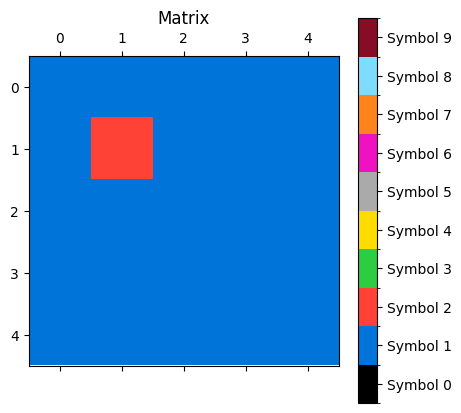

In [105]:
img = Image(0, 0, 3, 3, np.array([
[1, 1, 1],
[1, 2, 1],
[1, 1, 1]
]))
room = Image(0, 0, 5, 5)
result = extend(img, room)
display_matrix(result)